In [1]:
from sklearn.datasets import make_classification

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [6]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [13]:
# Split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

In [14]:
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
# Predict probabilities
yhat = model.predict_proba(testX)

In [17]:
pos_probs = yhat[:, 1]

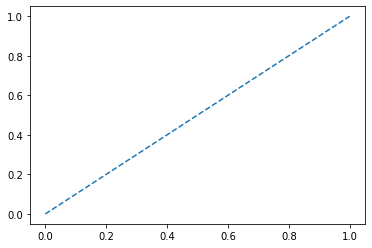

In [25]:
fpr, tpr, _ = roc_curve(testy, pos_probs)

Text(0, 0.5, 'True Positive Rate')

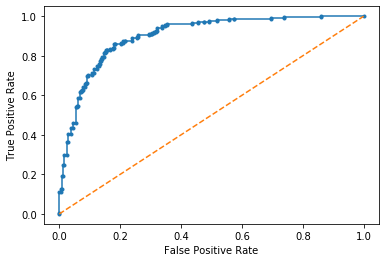

In [28]:
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

No Skill ROC AUC 0.490
Logistic ROC AUC 0.903


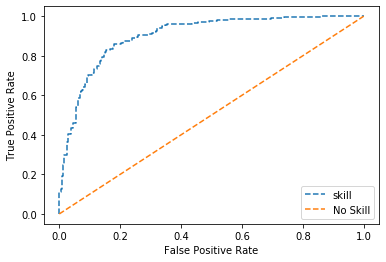

In [39]:
# example of a roc auc for a predictive model

from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_recall_curve

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

# no skill model, stratified random class predictions
model = DummyClassifier(strategy='stratified')
model.fit(trainX, trainy)
yhat = model.predict_proba(testX)
pos_probs = yhat[:, 1]

# calculate roc auc
roc_auc = roc_auc_score(testy, pos_probs)
print('No Skill ROC AUC %.3f' % roc_auc)

# skilled model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
yhat = model.predict_proba(testX)
pos_probs = yhat[:, 1]

# calculate roc auc
roc_auc = roc_auc_score(testy, pos_probs)
print('Logistic ROC AUC %.3f' % roc_auc)

fpr, tpr, _ = roc_curve(testy, pos_probs)
plt.plot(fpr, tpr, '--', label='skill')
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.legend()

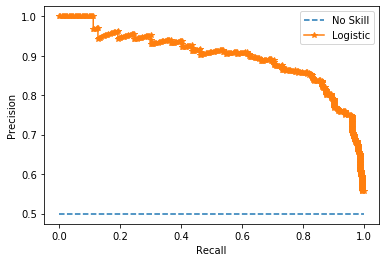

In [45]:
precision, recall, _ = precision_recall_curve(testy, pos_probs)
no_skill = len(y[y==1]) / len(y)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='*', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
